In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
data_org = pd.read_csv('reporte_semana_42.csv')  

In [3]:
df = data_org.copy()
df = df.drop(columns={"Institucion"})
df.head(5)

,Carrera,Carrito,Equipo,Fecha_y_ hora_Prestamo,Fecha_y_ hora_Devolucion,Modulo,Tipo_Dispositivo
0,MATEMATICAS APLICADAS Y COMPUTACION,C05,C17,10/18/24 17:30,10/18/24 18:45,Módulo 1 Explanada M@C,Chromebook
1,MATEMATICAS APLICADAS Y COMPUTACION,C01,L17,10/18/24 17:16,10/18/24 18:45,Módulo 1 Explanada M@C,Laptop
2,ARQUITECTURA,C04,L20,10/18/24 17:17,10/18/24 18:45,Módulo 1 Explanada M@C,Laptop
3,INGENIERIA CIVIL,C04,L18,10/18/24 17:15,10/18/24 18:45,Módulo 1 Explanada M@C,Laptop
4,PEDAGOGIA,C06,E16,10/18/24 17:14,10/18/24 18:45,Módulo 2 A-11,Chromebook


In [4]:
# Convertir las columnas de fecha y hora a formato datetime
df['Fecha_y_ hora_Prestamo'] = pd.to_datetime(df['Fecha_y_ hora_Prestamo'], format='%m/%d/%y %H:%M')
df['Fecha_y_ hora_Devolucion'] = pd.to_datetime(df['Fecha_y_ hora_Devolucion'], format='%m/%d/%y %H:%M')

# Calcular la duración del préstamo
df['Duracion_Prestamo'] = df['Fecha_y_ hora_Devolucion'] - df['Fecha_y_ hora_Prestamo']
# Convertir la duración del préstamo a un formato legible de horas y minutos
df['Duracion_Horas_Minutos'] = df['Duracion_Prestamo'].apply(lambda x: f"{int(x.total_seconds() // 3600)}:{int((x.total_seconds() % 3600) // 60):02d}")

df = df.drop(columns={"Duracion_Prestamo"})
# Convertir 'Duracion_Horas_Minutos' a minutos como número decimal
df['Duracion_Minutos'] = df['Duracion_Horas_Minutos'].apply(lambda x: int(x.split(":")[0]) * 60 + int(x.split(":")[1]))



In [5]:
df.head(5)

,Carrera,Carrito,Equipo,Fecha_y_ hora_Prestamo,Fecha_y_ hora_Devolucion,Modulo,Tipo_Dispositivo,Duracion_Horas_Minutos,Duracion_Minutos
0,MATEMATICAS APLICADAS Y COMPUTACION,C05,C17,2024-10-18 17:30:00,2024-10-18 18:45:00,Módulo 1 Explanada M@C,Chromebook,1:15,75
1,MATEMATICAS APLICADAS Y COMPUTACION,C01,L17,2024-10-18 17:16:00,2024-10-18 18:45:00,Módulo 1 Explanada M@C,Laptop,1:29,89
2,ARQUITECTURA,C04,L20,2024-10-18 17:17:00,2024-10-18 18:45:00,Módulo 1 Explanada M@C,Laptop,1:28,88
3,INGENIERIA CIVIL,C04,L18,2024-10-18 17:15:00,2024-10-18 18:45:00,Módulo 1 Explanada M@C,Laptop,1:30,90
4,PEDAGOGIA,C06,E16,2024-10-18 17:14:00,2024-10-18 18:45:00,Módulo 2 A-11,Chromebook,1:31,91


In [6]:
df.describe(percentiles=[x/10 for x in range(1,10)])

,Fecha_y_ hora_Prestamo,Fecha_y_ hora_Devolucion,Duracion_Minutos
count,2089,2089,2089.000000
mean,2024-10-16 08:19:04.911440896,2024-10-16 10:45:19.186213632,146.237913
min,2024-10-14 07:50:00,2024-10-14 10:20:00,70.000000
10%,2024-10-14 11:58:00,2024-10-14 14:28:00,150.000000
20%,2024-10-14 17:02:48,2024-10-14 18:45:00,150.000000
30%,2024-10-15 10:30:24,2024-10-15 13:00:24,150.000000
40%,2024-10-15 15:12:12,2024-10-15 17:42:12,150.000000
50%,2024-10-16 09:57:00,2024-10-16 12:27:00,150.000000
60%,2024-10-16 14:42:48,2024-10-16 17:12:48,150.000000
70%,2024-10-17 09:27:00,2024-10-17 11:57:00,150.000000


In [11]:
var_cat = ['Carrera', 'Carrito', 'Equipo', 'Modulo', 'Tipo_Dispositivo',]
var_num = ['Duracion_Minutos']

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2089 entries, 0 to 2088
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Carrera                   2089 non-null   object        
 1   Carrito                   2089 non-null   object        
 2   Equipo                    2089 non-null   object        
 3   Fecha_y_ hora_Prestamo    2089 non-null   datetime64[ns]
 4   Fecha_y_ hora_Devolucion  2089 non-null   datetime64[ns]
 5   Modulo                    2089 non-null   object        
 6   Tipo_Dispositivo          2089 non-null   object        
 7   Duracion_Horas_Minutos    2089 non-null   object        
 8   Duracion_Minutos          2089 non-null   int64         
dtypes: datetime64[ns](2), int64(1), object(6)
memory usage: 147.0+ KB


Columna: Carrera:20 subniveles
Columna: Carrera:['MATEMATICAS APLICADAS Y COMPUTACION' 'ARQUITECTURA' 'INGENIERIA CIVIL'
 'PEDAGOGIA' 'DERECHO (SUA)' 'DERECHO' 'ACTUARIA'
 'RELACIONES INTERNACIONALES' 'COMUNICACION' 'ENSEÃ‘ANZA DE INGLES'
 'ECONOMIA' 'FILOSOFIA' 'CIENCIAS POLITICAS Y ADMINISTRACION PUBLICA'
 'DISEÃ‘O GRAFICO' 'SOCIOLOGIA' 'PROFESOR'
 'LENGUA Y LITERATURAS HISPANICAS' 'HISTORIA'
 'ENSEÃ‘ANZA DE ESPAÃ‘OL COMO LENGUA EXTRANJERA'
 'RELACIONES INTERNACIONALES (SUA)'] subniveles
Columna: Carrito:8 subniveles
Columna: Carrito:['C05' 'C01' 'C04' 'C06' 'C03' 'C02' 'C07' 'C08'] subniveles
Columna: Equipo:118 subniveles
Columna: Equipo:['C17' 'L17' 'L20' 'L18' 'E16' 'L16' 'L15' 'L14' 'C16' 'E15' 'L13' 'C15'
 'L11' 'E14' 'E13' 'E12' 'L12' 'E11' 'E09' 'L09' 'C29' 'L08' 'E08' 'L07'
 'L04' 'L03' 'L02' 'E07' 'L01' 'E06' 'E05' 'E04' 'L22' 'L21' 'C28' 'E03'
 'E02' 'C14' 'T04' 'L10' 'C27' 'C30' 'C26' 'C25' 'C24' 'L06' 'C23' 'C22'
 'L05' 'C21' 'C20' 'L30' 'L29' 'L28' 'L27' 'L26' 'E26' 'C1

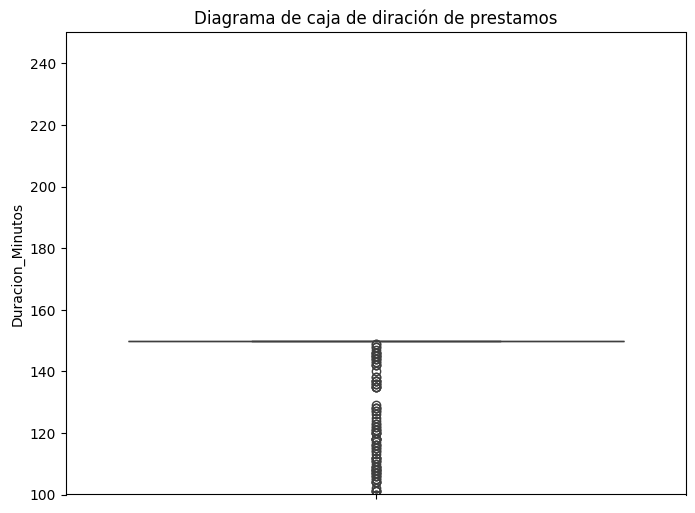

In [10]:
plt.figure(figsize=(8,6))
sns.boxplot(y=df['Duracion_Minutos'])
plt.ylim(100,250)
plt.title('Diagrama de caja de diración de prestamos')
plt.show()

In [ ]:
df.head(5)

In [ ]:
df_explanada_mac = df[df['Modulo'] == 'Módulo 1 Explanada M@C']
df_explanada_mac.head(5)

In [ ]:
df_modulo_2_A_11 = df[df['Modulo'] == 'Módulo 2 A-11']
df_modulo_2_A_11.head(5)

In [ ]:
df_modulo_3_CEDETEC = df[df['Modulo'] == 'Módulo 3 CEDETEC']
df_modulo_3_CEDETEC.head(5)

In [ ]:
for col in var_cat:
    print(f'Columna: {col}:{df_modulo_3_CEDETEC[col].nunique()} subniveles')
    print(f'Columna: {col}:{df[col].unique()} subniveles')

In [ ]:
df_explanada_mac.describe(percentiles=[x/10 for x in range(1,10)])

In [ ]:
df.to_csv('reporte_semana_42_limpio.csv', index=False)
df_explanada_mac.to_csv('reporte_semana_42_limpio_modulo1_explanada_mac.csv', index=False)
df_Módulo_3_CEDETEC.to_csv('reporte_semana_42_limpio_modulo3_CEDETEC.csv', index=False)
df_modulo_2_A_11.to_csv('reporte_semana_42_limpio_modulo2_A_11.csv', index=False)


In [ ]:
df.info()